In [133]:
%pdb off
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack as fftp
from scipy import pi,sin,cos

Automatic pdb calling has been turned OFF


In [2]:
sp.sin(pi)

1.2246467991473532e-16

In [3]:
a = sp.array([[sin(0),sin(2.*pi/3),sin(4.*(pi/3))],[cos(0),cos(2.*pi/3),cos(4.*(pi/3))]])

In [55]:
a

array([[ 0.       ,  0.8660254, -0.8660254],
       [ 1.       , -0.5      , -0.5      ]])

In [5]:
b = fftp.fft(a)
b

array([[  4.44089210e-16 +0.00000000e+00j,
         -2.22044605e-16 -1.50000000e+00j,
         -2.22044605e-16 +1.50000000e+00j],
       [ -2.22044605e-16 +0.00000000e+00j,
          1.50000000e+00 -5.76888806e-16j,
          1.50000000e+00 +5.76888806e-16j]])

In [6]:
omega = sp.array([0,1j,-1j])

In [7]:
omega

array([ 0.+0.j,  0.+1.j, -0.-1.j])

In [8]:
b[0,:]

array([  4.44089210e-16+0.j ,  -2.22044605e-16-1.5j,  -2.22044605e-16+1.5j])

In [9]:
b*omega

array([[  0.00000000e+00 +0.00000000e+00j,
          1.50000000e+00 -2.22044605e-16j,
          1.50000000e+00 +2.22044605e-16j],
       [ -0.00000000e+00 +0.00000000e+00j,
          5.76888806e-16 +1.50000000e+00j,
          5.76888806e-16 -1.50000000e+00j]])

In [10]:
c = fftp.ifft(b[0,:]*omega)

In [285]:
help(sp.fftpack.fft)

Help on function fft in module scipy.fftpack.basic:

fft(x, n=None, axis=-1, overwrite_x=False)
    Return discrete Fourier transform of real or complex sequence.
    
    The returned complex array contains ``y(0), y(1),..., y(n-1)`` where
    
    ``y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()``.
    
    Parameters
    ----------
    x : array_like
        Array to Fourier transform.
    n : int, optional
        Length of the Fourier transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the fft's are computed; the default is over the
        last axis (i.e., ``axis=-1``).
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    z : complex ndarray
        with the elements::
    
            [y(0),y(1),..,y(n/2),y(1-n/2),...,y(-

In [12]:
a

array([[ 0.       ,  0.8660254, -0.8660254],
       [ 1.       , -0.5      , -0.5      ]])

In [26]:
a.shape[1]

3

In [259]:
def _harmonic_deriv(omega,r):
    '''Derivative of a harmonic function using frequency methods
    Returns the derivatives of a harmonic function
    
    Parameters
    ----------
    omega: float
        Fundamendal frequency, in rad/sec, of repeating signal
    r: ndarray
        Array of rows of time histories to take the derivative of. 
        The 1 axis (each row) corresponds to a time history. 
    
    Returns
    -------
    s: ndarray
        array of function derivatives. 
        The 1 axis (each row) corresponds to a time history. 
    
    Examples
    --------
    >>> import matplotlib.pyplot as plt
    >>> import scipy as sp
    >>> from scipy import pi,sin,cos
    >>> f = 2
    >>> omega = 2.*pi * f
    >>> numsteps = 11
    >>> t = sp.arange(0,1/omega*2*pi,1/omega*2*pi/numsteps)
    >>> x = sp.array([sin(omega*t)])
    >>> v = sp.array([omega*cos(omega*t)])
    >>> states = sp.append(x,v,axis = 0)
    >>> state_derives = _harmonic_deriv(omega,states)
    >>> plt.plot(t,states.T,t,state_derives.T,'x')
    '''
    n = r.shape[1]
    print(n)
    # Need to check if omega is a float or the frequency array
    omega_half = sp.arange((n-1)/2+1) * omega * 1j
    omega_whole = sp.append(sp.conj(omega_half[-1:0:-1]),omega_half)
    # print(omega_whole)
    r_freq = fftp.fft(r)
    # print(r_freq)
    s_freq = r_freq * omega_whole
    # print(s_freq)
    s = -fftp.ifft(s_freq)/(n-2)*2
    return sp.real(s)

11


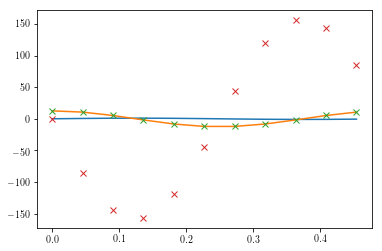

In [282]:
import matplotlib.pyplot as plt
import scipy as sp
from scipy import pi,sin,cos
f = 2
omega = 2.*pi * f
numsteps = 11
t = sp.arange(0,1/omega*2*pi,1/omega*2*pi/numsteps)
x = sp.array([sin(omega*t)])
v = sp.array([omega*cos(omega*t)])
states = sp.append(x,v,axis = 0)
state_derives = _har_deriv(omega,states)
plt.plot(t,states.T,t,state_derives.T,'x')

In [286]:
cc = sp.fftpack.diff(states)

error: failed in converting 2nd argument `omega' of convolve.convolve to C/Fortran array

In [287]:
help(sp.fftpack.diff)

Help on function diff in module scipy.fftpack.pseudo_diffs:

diff(x, order=1, period=None, _cache={(2, 1, 1.0): array([ 0.,  0.])})
    Return k-th derivative (or integral) of a periodic sequence x.
    
    If x_j and y_j are Fourier coefficients of periodic functions x
    and y, respectively, then::
    
      y_j = pow(sqrt(-1)*j*2*pi/period, order) * x_j
      y_0 = 0 if order is not 0.
    
    Parameters
    ----------
    x : array_like
        Input array.
    order : int, optional
        The order of differentiation. Default order is 1. If order is
        negative, then integration is carried out under the assumption
        that ``x_0 == 0``.
    period : float, optional
        The assumed period of the sequence. Default is ``2*pi``.
    
    Notes
    -----
    If ``sum(x, axis=0) = 0`` then ``diff(diff(x, k), -k) == x`` (within
    numerical accuracy).
    
    For odd order and even ``len(x)``, the Nyquist mode is taken zero.



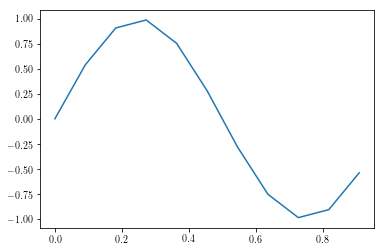

In [266]:
a = sp.array([sin(omega*t)])
plt.plot(t,a.T)

In [267]:
a;

In [268]:
v =_har_deriv(2*pi, a)
v

11


array([[ 6.28318531,  5.28575184,  2.61012951, -0.8941905 , -4.11461134,
        -6.02867215, -6.02867215, -4.11461134, -0.8941905 ,  2.61012951,
         5.28575184]])

In [276]:
bb = sp.append(a,v,axis=0)
bb

array([[ 0.        ,  0.54064082,  0.909632  ,  0.98982144,  0.75574957,
         0.28173256, -0.28173256, -0.75574957, -0.98982144, -0.909632  ,
        -0.54064082],
       [ 6.28318531,  5.28575184,  2.61012951, -0.8941905 , -4.11461134,
        -6.02867215, -6.02867215, -4.11461134, -0.8941905 ,  2.61012951,
         5.28575184]])

In [277]:
_har_deriv(2*pi,bb)

11


array([[  6.28318531e+00,   5.28575184e+00,   2.61012951e+00,
         -8.94190501e-01,  -4.11461134e+00,  -6.02867215e+00,
         -6.02867215e+00,  -4.11461134e+00,  -8.94190501e-01,
          2.61012951e+00,   5.28575184e+00],
       [  3.35806140e-16,  -2.13436440e+01,  -3.59108318e+01,
         -3.90765842e+01,  -2.98357973e+01,  -1.11223555e+01,
          1.11223555e+01,   2.98357973e+01,   3.90765842e+01,
          3.59108318e+01,   2.13436440e+01]])

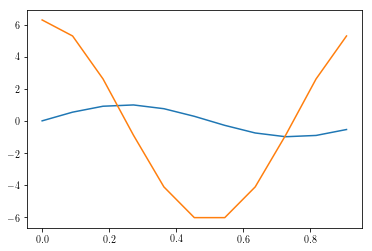

In [269]:
plt.plot(t,a.T,t,v.T)

In [131]:
t = sp.linspace(0,.1,6)
t = t[0:-1]
t

array([ 0.  ,  0.02,  0.04,  0.06,  0.08])

In [142]:
aa

array([[  0.        ,   0.19866933,   0.38941834,   0.56464247,
          0.71735609],
       [ 62.83185307,  61.57939922,  57.87196905,  51.85736609,  43.7753736 ]])

In [141]:
aa = sp.array([sin(10*t),2*pi*10*cos(10*t)])
aa

array([[  0.        ,   0.19866933,   0.38941834,   0.56464247,
          0.71735609],
       [ 62.83185307,  61.57939922,  57.87196905,  51.85736609,  43.7753736 ]])

In [124]:
_har_deriv(10*pi,aa)

array([[-2.79468232,  1.52550164,  2.5438553 ,  1.52224561, -2.79692023],
       [ 8.78707723, -1.27604141, -6.39681771, -6.38787073,  5.27365262]])

In [125]:
aa

array([[  0.00000000e+00,   1.99986667e-02,   3.99893342e-02,
          5.99640065e-02,   7.99146940e-02],
       [  6.28318531e+01,   6.28192871e+01,   6.27815943e+01,
          6.27187897e+01,   6.26308984e+01]])

In [128]:
62.8/8.787


2.2749357974669455